<a href="https://colab.research.google.com/github/johnnykoo84/DS-Unit-2-Applied-Modeling/blob/master/module4-model-interpretation/Ilmo_Koo_LS_DS_234_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Lambda School Data Science

*Unit 2, Sprint 3, Module 4*

---

# Model Interpretation

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Continue to iterate on your project: data cleaning, exploratory visualization, feature engineering, modeling.
- [ ] Make at least 1 partial dependence plot to explain your model.
- [ ] Make at least 1 Shapley force plot to explain an individual prediction.
- [ ] **Share at least 1 visualization (of any type) on Slack!**

If you aren't ready to make these plots with your own dataset, you can practice these objectives with any dataset you've worked with previously. Example solutions are available for Partial Dependence Plots with the Tanzania Waterpumps dataset, and Shapley force plots with the Titanic dataset. (These datasets are available in the data directory of this repository.)

Please be aware that **multi-class classification** will result in multiple Partial Dependence Plots (one for each class), and multiple sets of Shapley Values (one for each class).

## Stretch Goals

#### Partial Dependence Plots
- [ ] Make multiple PDPs with 1 feature in isolation.
- [ ] Make multiple PDPs with 2 features in interaction. 
- [ ] Use Plotly to make a 3D PDP.
- [ ] Make PDPs with categorical feature(s). Use Ordinal Encoder, outside of a pipeline, to encode your data first. If there is a natural ordering, then take the time to encode it that way, instead of random integers. Then use the encoded data with pdpbox. Get readable category names on your plot, instead of integer category codes.

#### Shap Values
- [ ] Make Shapley force plots to explain at least 4 individual predictions.
    - If your project is Binary Classification, you can do a True Positive, True Negative, False Positive, False Negative.
    - If your project is Regression, you can do a high prediction with low error, a low prediction with low error, a high prediction with high error, and a low prediction with high error.
- [ ] Use Shapley values to display verbal explanations of individual predictions.
- [ ] Use the SHAP library for other visualization types.

The [SHAP repo](https://github.com/slundberg/shap) has examples for many visualization types, including:

- Force Plot, individual predictions
- Force Plot, multiple predictions
- Dependence Plot
- Summary Plot
- Summary Plot, Bar
- Interaction Values
- Decision Plots

We just did the first type during the lesson. The [Kaggle microcourse](https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values) shows two more. Experiment and see what you can learn!

### Links

#### Partial Dependence Plots
- [Kaggle / Dan Becker: Machine Learning Explainability — Partial Dependence Plots](https://www.kaggle.com/dansbecker/partial-plots)
- [Christoph Molnar: Interpretable Machine Learning — Partial Dependence Plots](https://christophm.github.io/interpretable-ml-book/pdp.html) + [animated explanation](https://twitter.com/ChristophMolnar/status/1066398522608635904)
- [pdpbox repo](https://github.com/SauceCat/PDPbox) & [docs](https://pdpbox.readthedocs.io/en/latest/)
- [Plotly: 3D PDP example](https://plot.ly/scikit-learn/plot-partial-dependence/#partial-dependence-of-house-value-on-median-age-and-average-occupancy)

#### Shapley Values
- [Kaggle / Dan Becker: Machine Learning Explainability — SHAP Values](https://www.kaggle.com/learn/machine-learning-explainability)
- [Christoph Molnar: Interpretable Machine Learning — Shapley Values](https://christophm.github.io/interpretable-ml-book/shapley.html)
- [SHAP repo](https://github.com/slundberg/shap) & [docs](https://shap.readthedocs.io/en/latest/)

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://github.com/johnnykoo84/DS-Unit-2-Applied-Modeling/data/'
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pdpbox
    !pip install shap

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [8]:
# load the file
from google.colab import files
student_math_csv = files.upload()

Saving student-mat.csv to student-mat.csv


Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets: 1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

2 sex - student's sex (binary: 'F' - female or 'M' - male)

3 age - student's age (numeric: from 15 to 22)

4 address - student's home address type (binary: 'U' - urban or 'R' - rural)

5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')

13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)

16 schoolsup - extra educational support (binary: yes or no)

17 famsup - family educational support (binary: yes or no)

18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

19 activities - extra-curricular activities (binary: yes or no)

20 nursery - attended nursery school (binary: yes or no)

21 higher - wants to take higher education (binary: yes or no)

22 internet - Internet access at home (binary: yes or no)

23 romantic - with a romantic relationship (binary: yes or no)

24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)

26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)

27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

29 health - current health status (numeric: from 1 - very bad to 5 - very good)

30 absences - number of school absences (numeric: from 0 to 93)

these grades are related with the course subject, Math or Portuguese: 31 G1 - first period grade (numeric: from 0 to 20)

31 G2 - second period grade (numeric: from 0 to 20)

32 G3 - final grade (numeric: from 0 to 20, output target)

In [9]:
import pandas as pd
pd.options.display.max_columns = None
# df_por = pd.read_csv('./student-por.csv', sep=';')
df = pd.read_csv('./student-mat.csv', sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [11]:
#installing package inside Google Colab
!pip install category_encoders==2.*

In [12]:
# G1, G2 are highly corelated to G3 and it makes sense
# so I would like to drop G1 and G2 because there is no point if Grades are used to predict the final grade
# there will be situation where no G1 and G2 are given and predict G3 so.

df = df.drop(['G1', 'G2'],  axis=1)
df.shape

(395, 31)

In [0]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size=0.80, test_size=0.20, random_state=42)

In [0]:
### The status_group column is the target
target = 'G3'

### Get a dataframe with all train columns except the target
train_features = train.drop(columns=[target])

### Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

### Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

### Get a list of all categorical features with cardinality <= 50
categorical_features = cardinality[cardinality <= 50].index.tolist()

### Combine the lists 
features = numeric_features + categorical_features

In [0]:
### Arrange data into X features matrix and y target vector 
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


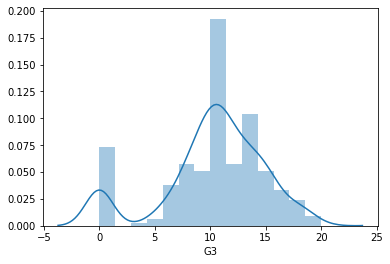

In [16]:
# The target has some right skew, but it's not too bad
%matplotlib inline
import seaborn as sns
sns.distplot(y_train);

In [17]:
import category_encoders as ce
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr = make_pipeline(
    ce.TargetEncoder(),  
    LinearRegression()
)

lr.fit(X_train, y_train)
print('Linear Regression R^2', lr.score(X_test, y_test))

Linear Regression R^2 0.10916081354641916


Explaining Linear Regression

In [18]:
coefficients = lr.named_steps['linearregression'].coef_
pd.Series(coefficients, features)

age           -0.365365
Medu           0.228137
Fedu          -0.077906
traveltime    -0.198407
studytime      0.752269
failures      -1.820615
famrel         0.263313
freetime       0.245140
goout         -0.372690
Dalc          -0.135046
Walc           0.007305
health        -0.139264
absences       0.061867
school        -1.030382
sex            1.900185
address        0.296819
famsize        0.752757
Pstatus        0.571928
Mjob           0.502139
Fjob           0.566384
reason         0.526171
guardian      -0.520421
schoolsup      1.419590
famsup         4.570386
paid           0.464179
activities    47.452901
nursery       -0.789318
higher         0.364438
internet       0.437086
romantic       0.741921
dtype: float64

Gradient Boost

In [20]:
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

gb = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBRegressor(n_estimators=200, objective='reg:squarederror', n_jobs=-1)
)

gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print('Gradient Boosting R^2', r2_score(y_test, y_pred))

Gradient Boosting R^2 0.2389807025725501


In [21]:
gb.named_steps['xgbregressor'].feature_importances_

array([0.0132847 , 0.02516896, 0.01069272, 0.03189505, 0.03137045,
       0.21148425, 0.02066529, 0.01653564, 0.0294063 , 0.01994298,
       0.02186735, 0.02029874, 0.05506522, 0.03555815, 0.02998517,
       0.03796821, 0.01278098, 0.06938301, 0.02124703, 0.02041773,
       0.02351169, 0.05056262, 0.04840339, 0.01308174, 0.01958641,
       0.01176173, 0.02107855, 0.02923543, 0.02823827, 0.01952222],
      dtype=float32)

Partial Dependence Plots with 1 feature

In [0]:
# Later, when you save matplotlib images to include in blog posts or web apps,
# increase the dots per inch (double it), so the text isn't so fuzzy
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72

In [0]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'studytime'

isolated = pdp_isolate(
    model=gb,
    dataset=X_test,
    model_features=X_test.columns,
    feature=feature
)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


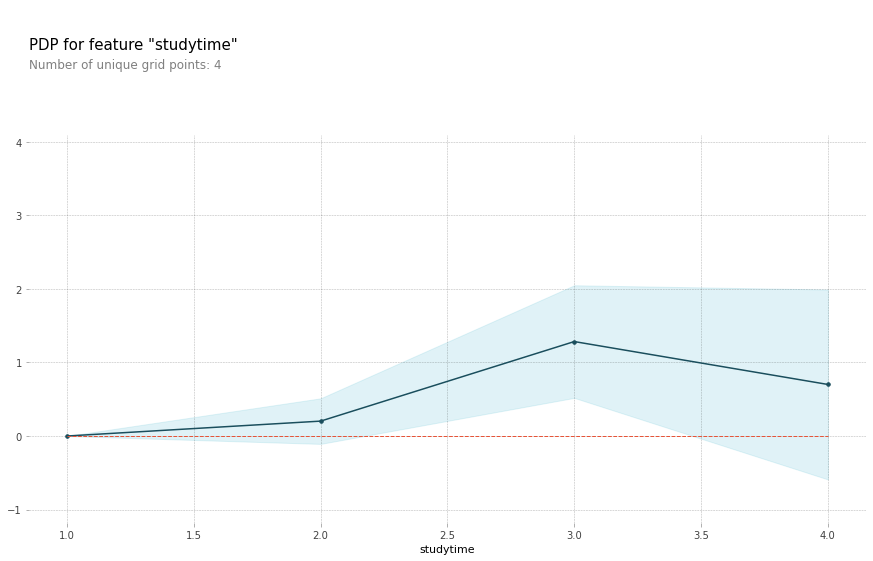

In [24]:
pdp_plot(isolated, feature_name=feature);

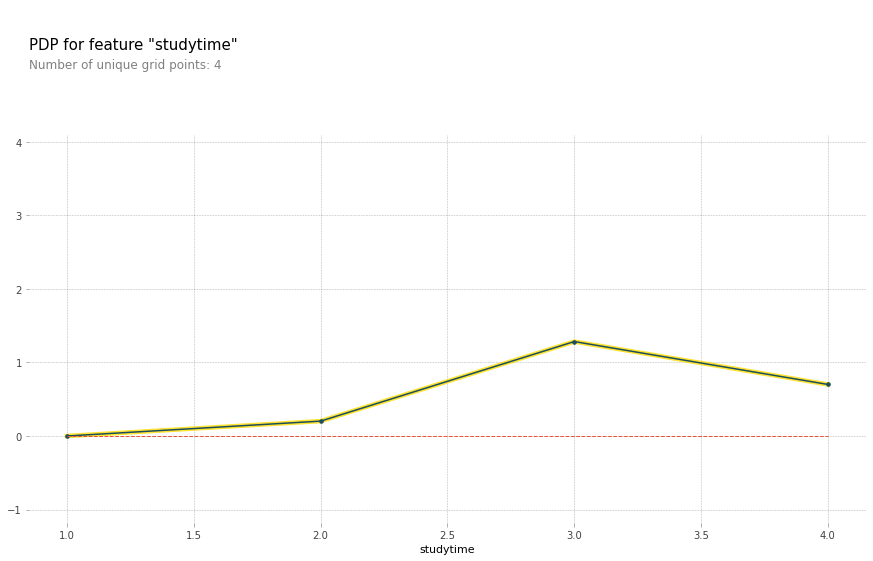

In [25]:
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=0.01);

In [0]:
isolated = pdp_isolate(
    model=gb,
    dataset=X_test,
    model_features=X_test.columns,
    feature=feature,
    num_grid_points=50
)

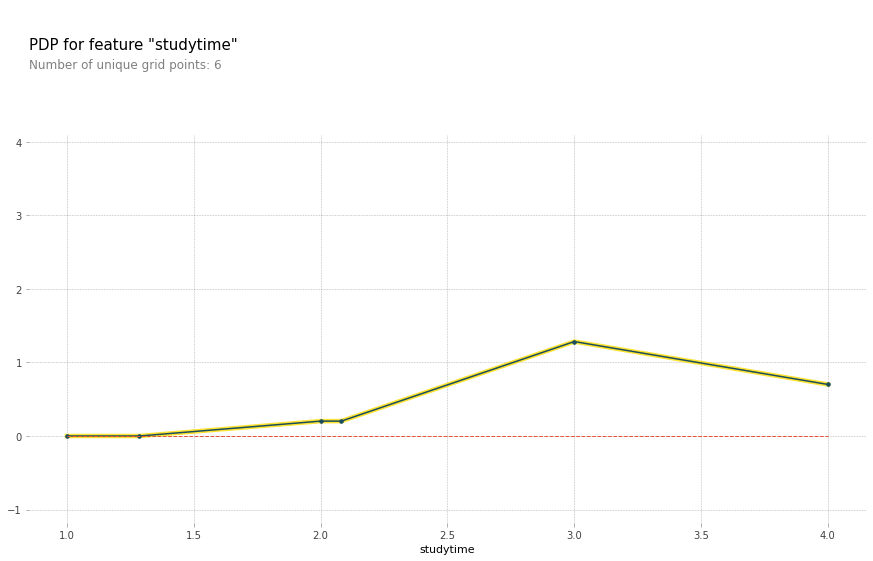

In [27]:
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=0.01);

PDP with 2 features


In [0]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['studytime', 'failures']

interaction = pdp_interact(
    model=gb,
    dataset=X_test,
    model_features=X_test.columns,
    features=features
)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


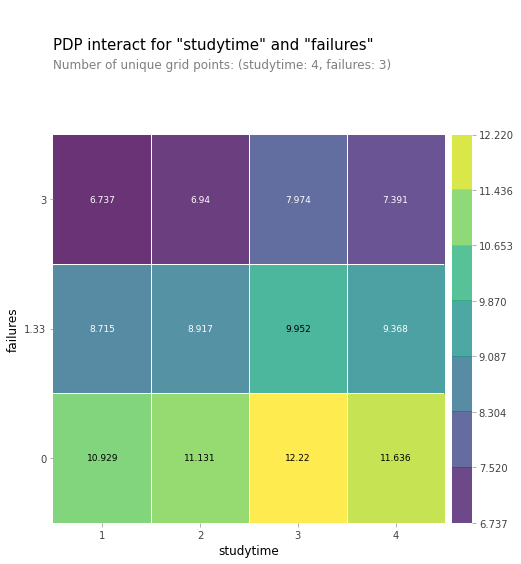

In [29]:
pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

SHAP

In [31]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G3             int64
dtype: object

In [0]:
# Assign to X, y
X_train = train[numeric_features]
y_train = train[target]
X_test = test[numeric_features]
y_test = test[target]

In [34]:
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

param_distributions = { 
    'n_estimators': randint(50, 500), 
    'max_depth': [5, 10, 15, 20, None], 
    'max_features': uniform(0, 1), 
}

search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42), 
    param_distributions=param_distributions, 
    n_iter=5, 
    cv=2, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1, 
    random_state=42
)

search.fit(X_train, y_train);

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.5s finished


In [35]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)
model = search.best_estimator_

Best hyperparameters {'max_depth': 20, 'max_features': 0.9507143064099162, 'n_estimators': 156}
Cross-validation MAE 3.1077977929243756


In [0]:
# Why did the model predict this?
# Look at a Shapley Values Force Plot
import shap

In [39]:
# Get an individual observation to explain.
# For example, the 0th row from the test set.
row = X_test.iloc[[0]]
row

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
78,17,2,1,2,1,3,4,5,1,1,1,3,2


In [40]:
# What was the actual rent for this apartment?
y_test.iloc[[0]]

78    10
Name: G3, dtype: int64

In [41]:
# What does the model predict for this apartment?
model.predict(row)

array([9.36538462])

In [42]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)
shap_values

array([[-1.42727545e-01, -1.29180824e-01, -2.39805615e-01,
        -4.28298651e-02, -1.43193992e-01, -2.59045570e+00,
         2.26957845e-02,  2.30126121e-01,  4.21021020e-01,
         3.86016092e-02,  6.08149133e-04, -2.99800636e-01,
         1.92003643e+00]])

In [43]:
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row
)

In [44]:
y_train.mean()

10.325949367088608

In [45]:
explainer.expected_value

array([10.32028968])

In [46]:
shap_values

array([[-1.42727545e-01, -1.29180824e-01, -2.39805615e-01,
        -4.28298651e-02, -1.43193992e-01, -2.59045570e+00,
         2.26957845e-02,  2.30126121e-01,  4.21021020e-01,
         3.86016092e-02,  6.08149133e-04, -2.99800636e-01,
         1.92003643e+00]])

In [47]:
X_train.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences'],
      dtype='object')

In [48]:
model.predict(row)

array([9.36538462])

In [49]:
explainer.expected_value + shap_values.sum()

array([9.36538462])